In [1]:
from fixedpoint import FixedPoint
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from mandelbrot_functions import mandelbrot_iter, mandelbrot_loop, real_values, imag_values, m, n, MAX_ITER, R, screen, resize
def FP(x):
    return FixedPoint(x, m=m, n=n, signed=True, str_base=2)

In [2]:
ratio = 2

real = real_values[::ratio]
imag = imag_values[::ratio]

ENABLE_FIXED = True
ENABLE_FLOAT = True


array_float = np.zeros([len(imag), len(real)], dtype=float)
array_fixed = np.zeros([len(imag), len(real)], dtype=FixedPoint)

for xi in trange(len(real), desc='X'):
    x = real[xi]
    for yi, y in enumerate(imag):
        if ENABLE_FLOAT:
            array_float[yi,xi] = mandelbrot_loop(x, y, R, m=m, n=n, max_iter=MAX_ITER)
        if ENABLE_FIXED:
            array_fixed[yi,xi] = mandelbrot_loop(FP(x), FP(y), FP(R), m=m, n=n, max_iter=MAX_ITER)

X:   0%|          | 0/512 [00:00<?, ?it/s]

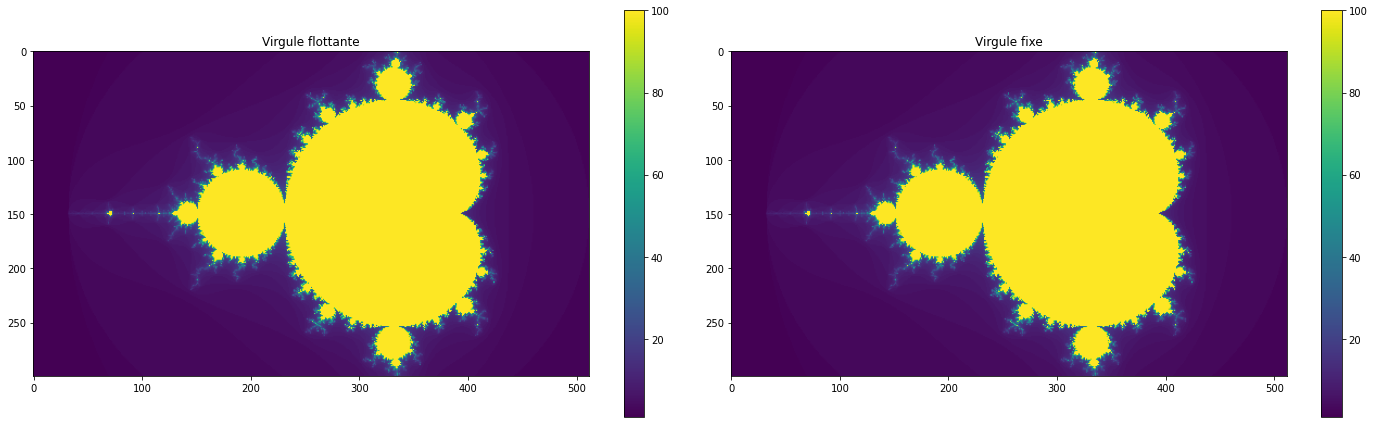

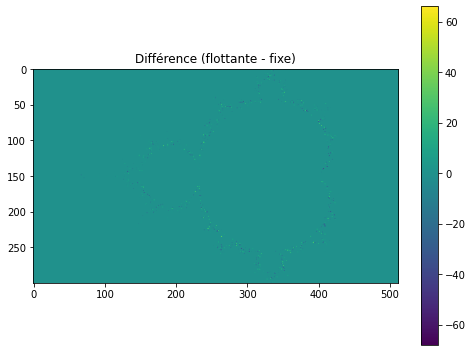

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('Virgule flottante')
plt.imshow(array_float)
plt.colorbar()
plt.subplot(122)
plt.title('Virgule fixe')
plt.imshow(array_fixed.astype(float))
plt.colorbar()
plt.tight_layout()
plt.savefig("../Rapport/mandelbrot_comparaison.png", dpi=200)
plt.show()

plt.figure(figsize=(7,5))
plt.imshow(array_float - array_fixed.astype(float))
plt.colorbar()
plt.title('Différence (flottante - fixe)')
plt.tight_layout()
plt.savefig("../Rapport/mandelbrot_difference.png", dpi=200)
plt.show()

In [5]:
# Stockage dans un fichier
np.save("mandelbrot_iterations", array_float)

Top left real : 101110011001100110
Top left imag : 000111100000000000
increment : 000000000001100111


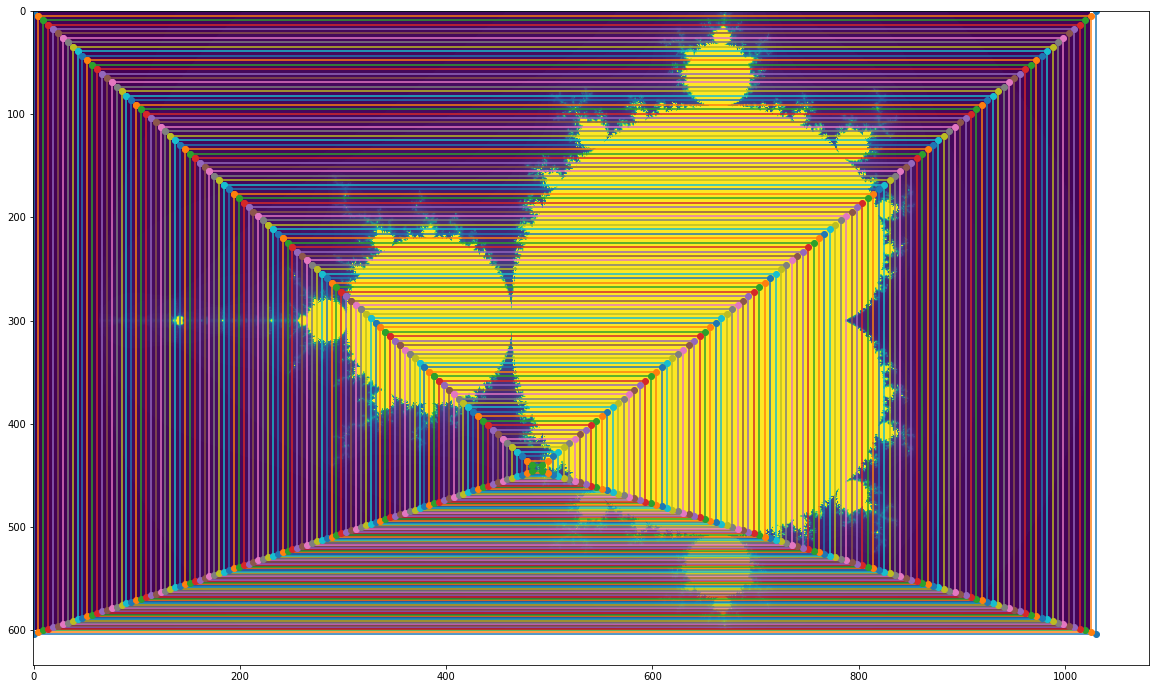

In [8]:
top_left_real = FP(np.min(real_values))
top_left_imag = FP(np.max(imag_values))
increment = FP(real_values[1] - real_values[0])

print(f"Top left real : {str(top_left_real)}")
print(f"Top left imag : {str(top_left_imag)}")
print(f"increment : {str(increment)}")


zoom_iteration = FP("0b111111111111111111")
real_iteration = FP(0.0148) 
imag_iteration = FP(-0.0135)



N_zoom = 103


plt.imsave("mandelbrot.png", array_float)

plt.figure(figsize=(20,20))
plt.imshow(array_float)


def float_to_index_real(x):
    return (x - np.min(real_values)) / (np.max(real_values) - np.min(real_values)) * screen[0]
def float_to_index_imag(x):
    return screen[1] - (x - np.min(imag_values)) / (np.max(imag_values) - np.min(imag_values)) * screen[1]    

for _ in range(N_zoom):
    plt.plot([
        float_to_index_real(float(top_left_real)),
        float_to_index_real(float(top_left_real + screen[0] * increment)),
        float_to_index_real(float(top_left_real + screen[0] * increment)),
        float_to_index_real(float(top_left_real)),
        float_to_index_real(float(top_left_real)),
    ],
    [
        float_to_index_imag(float(top_left_imag)),
        float_to_index_imag(float(top_left_imag)),
        float_to_index_imag(float(top_left_imag - screen[1] * increment)),
        float_to_index_imag(float(top_left_imag - screen[1] * increment)),
        float_to_index_imag(float(top_left_imag)),
    ], '-o')


    top_left_real = resize(top_left_real + real_iteration)
    top_left_imag = resize(top_left_imag + imag_iteration)
    increment = resize(increment + zoom_iteration)







In [7]:
print(f"Iteration sur le zoom              : {str(zoom_iteration)}")
print(f"Iteration sur la partie réelle     : {str(real_iteration)}")
print(f"Itération sur la partie imaginaire : {str(imag_iteration)}")

Iteration sur le zoom              : 111111111111111111
Iteration sur la partie réelle     : 000000000111100101
Itération sur la partie imaginaire : 111111111001000110
